# installing libraries

In [1]:
!pip install numpy


In [2]:
!pip install matplotlib yfinance seaborn pandas


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [4]:
sns.set(style="whitegrid")


#User-defined portfolio (Indian equities)
#Portfolio weights (must sum to 1)


In [5]:
tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS"]
weights = [0.25, 0.25, 0.25, 0.25]

print("Portfolio tickers:", tickers)
print("Portfolio weights:", weights)

Portfolio tickers: ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS']
Portfolio weights: [0.25, 0.25, 0.25, 0.25]


# Download 1 year of daily stock data


In [6]:
data = yf.download(tickers, period="1y")
print("Downloaded stock data:")



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31356\1466979669.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y")
[*********************100%***********************]  4 of 4 completed

Downloaded stock data:


In [8]:
data.head()

Price            Close                                               High  \
Ticker     HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS HDFCBANK.NS   
Date                                                                        
2024-10-08  814.515259  1899.881836  1391.791260  4115.565918  817.351916   
2024-10-09  805.684570  1903.976807  1369.131836  4115.276367  817.327185   
2024-10-10  820.114502  1871.069946  1365.595947  4090.552979  821.619127   
2024-10-11  814.490540  1886.767700  1366.641724  4014.884277  821.125826   
2024-10-14  832.793152  1909.973267  1367.065063  4002.740479  834.741848   

Price                                                     Low               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS HDFCBANK.NS      INFY.NS   
Date                                                                         
2024-10-08  1909.046960  1395.426764  4140.869309  800.183950  1858.735778   
2024-10-09  1927.621122  1395.401917  4155.964962  803.489208  1896.517854   
2024-10-10  1914.946000  1380.486427  4154.852087  805.363874  1866.292308   
2024-10-11  1898.370502  1377.772318  4104.631819  810.667219  1862.392116   
2024-10-14  1920.308490  1374.584956  4030.559799  815.970555  1882.867570   

Price                                       Open                            \
Ticker      RELIANCE.NS       TCS.NS HDFCBANK.NS      INFY.NS  RELIANCE.NS   
Date                                                                         
2024-10-08  1359.669552  4067.862022  804.130603  1889.497813  1367.513225   
2024-10-09  1367.040214  4109.228688  813.750530  1903.781850  1391.965689   
2024-10-10  1363.977412  4062.685464  808.570530  1908.998381  1374.535220   
2024-10-11  1363.379727  3979.323931  821.125826  1870.094824  1364.550102   
2024-10-14  1362.807045  3988.758530  816.981909  1883.891392  1373.962443   

Price                        Volume                                
Ticker           TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                               
2024-10-08  4134.289624    29734406  5637391    17020808  1541867  
2024-10-09  4122.097960    41125642  4857163    14310610  1082504  
2024-10-10  4115.566272    21754766  4782119    22358646  2378875  
2024-10-11  4008.884792    23672594  4709431     7980122  5759183  
2024-10-14  4005.982129    18527508  3751378    12221432  2137590

#Check starting and ending date of data

In [7]:
start_date = data.index.min()
end_date = data.index.max()

print("Data starts from:", start_date)
print("Data ends on:", end_date)


Data starts from: 2024-10-08 00:00:00
Data ends on: 2025-10-08 00:00:00


#Define  bought quantity and buy price for each stock

In [8]:
portfolio_info = {
    "RELIANCE.NS": {"qty": 10, "buy_price": 2500},
    "TCS.NS": {"qty": 8, "buy_price": 3300},
    "HDFCBANK.NS": {"qty": 15, "buy_price": 1600},
    "INFY.NS": {"qty": 12, "buy_price": 1500},
}

results = []

for ticker, info in portfolio_info.items():
    current_price = data["Close"][ticker].iloc[-1]
    
    qty = info["qty"]
    investment = qty * info["buy_price"]
    current_value = qty * current_price
    profit_loss = current_value - investment
    
    results.append([ticker, qty, info["buy_price"], round(current_price,2),
                    investment, round(current_value,2), round(profit_loss,2)])

portfolio_df = pd.DataFrame(results, columns=[
                                             " Stock", "Quantity", "Buy Price", 
                                              "Current Price", "Investment", 
                                              "Current Value", "Profit/Loss"])

total_investment = portfolio_df["Investment"].sum()
total_current_value = portfolio_df["Current Value"].sum()
total_profit_loss = portfolio_df["Profit/Loss"].sum()


total_row = pd.DataFrame([["Total", "", "", "", 
                           total_investment, 
                           total_current_value, 
                           total_profit_loss]],
                         columns=portfolio_df.columns)

portfolio_df = pd.concat([portfolio_df, total_row], ignore_index=True)

portfolio_df



                                            
                                              
                                              
                    










    



,Stock,Quantity,Buy Price,Current Price,Investment,Current Value,Profit/Loss
0,RELIANCE.NS,10,2500,1367.4,25000,13674.0,-11326.0
1,TCS.NS,8,3300,3027.2,26400,24217.6,-2182.4
2,HDFCBANK.NS,15,1600,978.7,24000,14680.5,-9319.5
3,INFY.NS,12,1500,1495.0,18000,17940.0,-60.0
4,Total,,,,93400,70512.1,-22887.9


# portfolio visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31356\615003413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=" Stock", y="Profit/Loss", data=portfolio_df[:-1], palette="coolwarm")


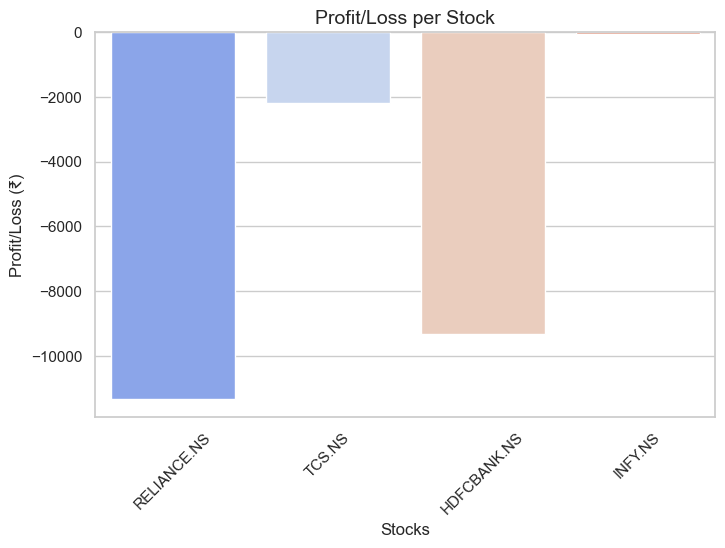

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x=" Stock", y="Profit/Loss", data=portfolio_df[:-1], palette="coolwarm")
plt.title("Profit/Loss per Stock", fontsize=14)
plt.ylabel("Profit/Loss (₹)")
plt.xlabel("Stocks")
plt.xticks(rotation=45)
plt.show()


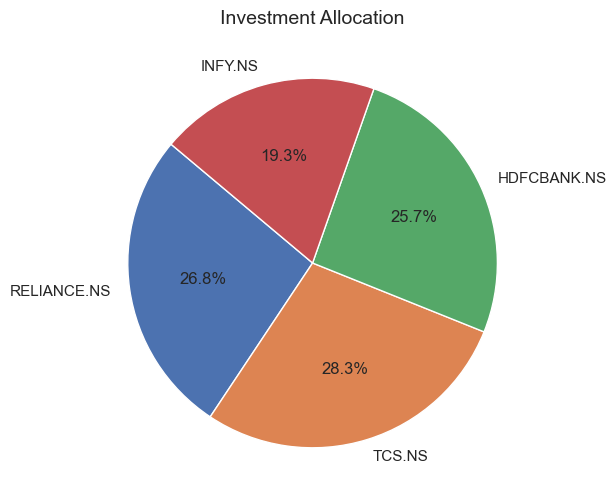

In [10]:
plt.figure(figsize=(6,6))
plt.pie(portfolio_df[:-1]["Investment"], labels=portfolio_df[:-1][" Stock"], autopct='%1.1f%%', startangle=140)
plt.title("Investment Allocation", fontsize=14)
plt.savefig("Investment Allocation.png")
plt.show()


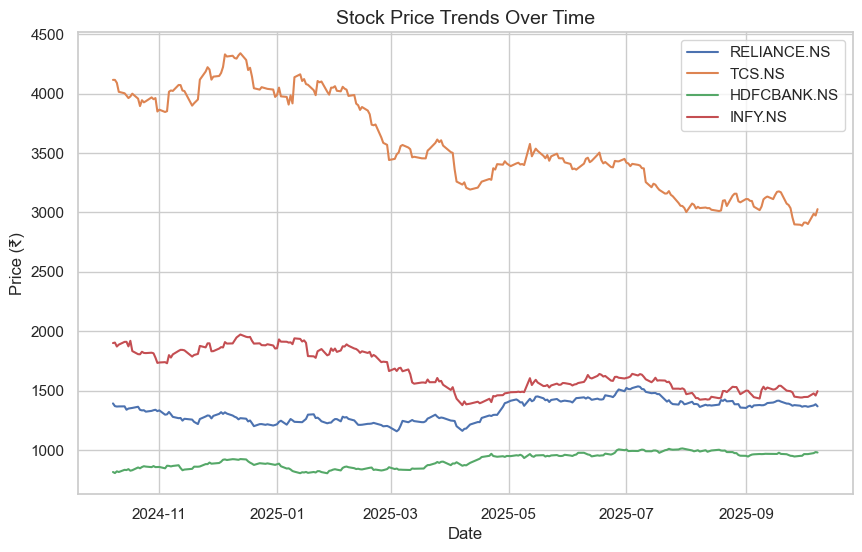

In [11]:
plt.figure(figsize=(10,6))

for ticker in tickers:
    plt.plot(data["Close"][ticker], label=ticker)

plt.title("Stock Price Trends Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.savefig("Stock Price Trends Over Time.png")
plt.show()


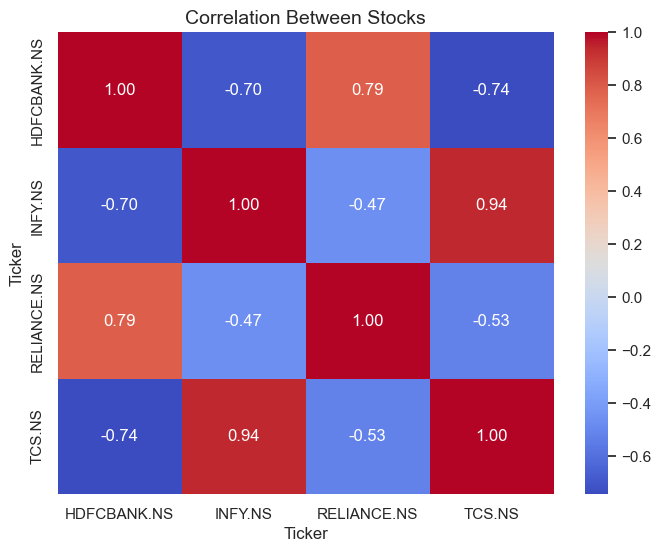

In [13]:
plt.figure(figsize=(8,6))
corr = data["Close"].corr()   # correlation of stock closing prices
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between Stocks", fontsize=14)
plt.savefig("Correlation Between Stocks.png")
plt.show()


In [16]:
#  Portfolio Returns & Risk Analysis

#  Daily returns of each stock
daily_returns = data["Close"].pct_change().dropna()

#  Portfolio daily returns
portfolio_daily_return = (daily_returns * weights).sum(axis=1)

#  Mean return and risk
mean_daily_return = portfolio_daily_return.mean()
volatility = portfolio_daily_return.std()


In [17]:
!pip install scipy

In [18]:


from scipy import stats as st
# Descriptive statistics of stock daily returns
stats = daily_returns.describe().T[["mean", "std", "min", "max"]]
stats.rename(columns={
    "mean": "Average Daily Return",
    "std": "Volatility (Std Dev)",
    "min": "Worst Day Return",
    "max": "Best Day Return"
}, inplace=True)

print(" Stock-wise Return Statistics")
display(stats)


#  Portfolio Sharpe Ratio
risk_free_rate = 0.0005  # daily risk-free rate ~0.05%
sharpe_ratio = (mean_daily_return - risk_free_rate) / volatility

print("\n Portfolio Sharpe Ratio:", round(sharpe_ratio, 2))


#  ANOVA Test (check if stock returns differ significantly)
from scipy import stats as st

anova_result = st.f_oneway(*[daily_returns[col] for col in daily_returns.columns])

print("\n ANOVA Test Results")
print("F-statistic:", round(anova_result.statistic, 2))
print("p-value:", anova_result.pvalue)


 Stock-wise Return Statistics


,Average Daily Return,Volatility (Std Dev),Worst Day Return,Best Day Return
Ticker,,,,
HDFCBANK.NS,0.000790,0.010803,-0.033011,0.035720
INFY.NS,-0.000824,0.016184,-0.058596,0.079132
RELIANCE.NS,0.000011,0.012775,-0.035237,0.052599
TCS.NS,-0.001137,0.013170,-0.039730,0.056155



 Portfolio Sharpe Ratio: -0.08

 ANOVA Test Results
F-statistic: 1.06
p-value: 0.3665061938309063


Portfolio Statistics:
Average Daily Return: -0.0003
Volatility (Std Dev): 0.0097
Sharpe Ratio: -0.47


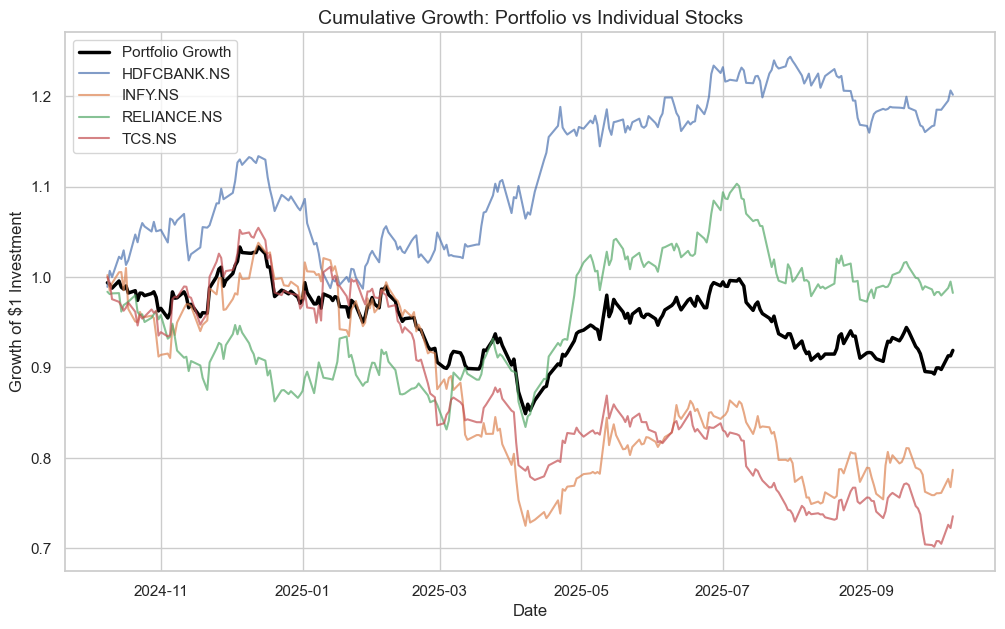

In [19]:
# Step 1: Daily Portfolio Return
weights = [0.25, 0.25, 0.25, 0.25]   # equal weights for 4 stocks
daily_portfolio_return = (daily_returns * weights).sum(axis=1)

# Step 2: Cumulative Portfolio Growth
cumulative_portfolio = (1 + daily_portfolio_return).cumprod()

# Step 3: Portfolio Risk and Sharpe Ratio
avg_daily_return = daily_portfolio_return.mean()
volatility = daily_portfolio_return.std()
sharpe_ratio = (avg_daily_return / volatility) * np.sqrt(252)   # annualized Sharpe

print("Portfolio Statistics:")
print(f"Average Daily Return: {avg_daily_return:.4f}")
print(f"Volatility (Std Dev): {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Step 4: Plot Cumulative Growth (Portfolio + Stocks)
plt.figure(figsize=(12,7))

# Plot portfolio
plt.plot(cumulative_portfolio, label="Portfolio Growth", linewidth=2.5, color="black")

# Plot each stock cumulative return
cumulative_stocks = (1 + daily_returns).cumprod()
for ticker in cumulative_stocks.columns:
    plt.plot(cumulative_stocks[ticker], label=ticker, alpha=0.7)

plt.title("Cumulative Growth: Portfolio vs Individual Stocks", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.legend()
plt.show()


In [21]:
# 1. Calculate portfolio daily returns
portfolio_daily_returns = (daily_returns * weights).sum(axis=1)

# 2. Portfolio risk (standard deviation of daily returns)
portfolio_volatility = portfolio_daily_returns.std()

# 3. Portfolio average daily return
portfolio_avg_return = portfolio_daily_returns.mean()

# 4. Annualize (since stock market ~252 trading days per year)
annual_return = portfolio_avg_return * 252
annual_volatility = portfolio_volatility * (252 ** 0.5)

# 5. Sharpe Ratio (risk-adjusted return)
# Assume risk-free rate = 0 for simplicity
sharpe_ratio = annual_return / annual_volatility

print(" Portfolio Risk Analysis")
print(f"Average Daily Return : {portfolio_avg_return:.4f}")
print(f"Daily Volatility     : {portfolio_volatility:.4f}")
print(f"Annual Return        : {annual_return:.2%}")
print(f"Annual Volatility    : {annual_volatility:.2%}")
print(f"Sharpe Ratio         : {sharpe_ratio:.2f}")


 Portfolio Risk Analysis
Average Daily Return : -0.0003
Daily Volatility     : 0.0097
Annual Return        : -7.31%
Annual Volatility    : 15.40%
Sharpe Ratio         : -0.47


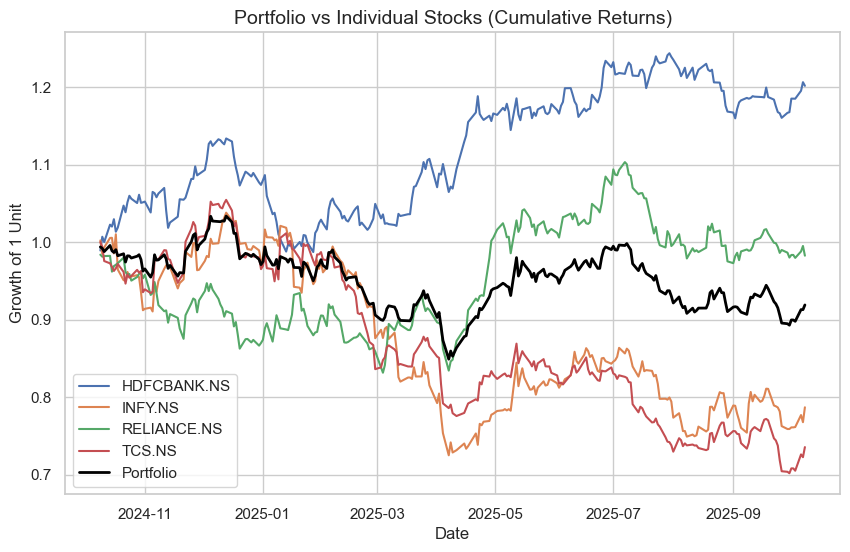

In [23]:
# Cumulative returns for each stock
cumulative_returns = (1 + daily_returns).cumprod()

# Cumulative portfolio returns
cumulative_portfolio = (1 + portfolio_daily_returns).cumprod()

# Plot comparison
plt.figure(figsize=(10,6))
for ticker in daily_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.plot(cumulative_portfolio.index, cumulative_portfolio, 
         label="Portfolio", linewidth=2, color="black")

plt.title("Portfolio vs Individual Stocks (Cumulative Returns)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Growth of 1 Unit")
plt.legend()
plt.savefig("Portfolio vs Individual Stocks (Cumulative Returns).png")
plt.show()


In [20]:
# Final Summary Table: Portfolio & Individual Stocks

# Stock statistics 
stock_stats = daily_returns.describe().T[["mean", "std", "min", "max"]]
stock_stats.rename(columns={
    "mean": "Avg Daily Return",
    "std": "Volatility",
    "min": "Worst Day",
    "max": "Best Day"
}, inplace=True)

# Portfolio stats
portfolio_stats = pd.Series({
    "Avg Daily Return": portfolio_daily_returns.mean(),
    "Volatility": portfolio_daily_returns.std(),
    "Worst Day": portfolio_daily_returns.min(),
    "Best Day": portfolio_daily_returns.max(),
}, name="Portfolio")

# Combine into one table
final_summary = pd.concat([stock_stats, portfolio_stats.to_frame().T])

print(" Final Summary of Portfolio & Stocks")
display(final_summary)


 Final Summary of Portfolio & Stocks


,Avg Daily Return,Volatility,Worst Day,Best Day
HDFCBANK.NS,0.000790,0.010803,-0.033011,0.035720
INFY.NS,-0.000824,0.016184,-0.058596,0.079132
RELIANCE.NS,0.000011,0.012775,-0.035237,0.052599
TCS.NS,-0.001137,0.013170,-0.039730,0.056155
Portfolio,-0.000290,0.009703,-0.027668,0.052565
